# Assignment 4: Pandas Missing Values and Plotting

In this notebook we will practice using the new Pandas functions covered this week, as well as some of what you learned previously.

You are analyzing data from "Frog Racing", a car racing group out of Massachusetts ("Frog" is part of their name; they aren't racing frogs). This data is from one of their cars during a 2015 race. The data is in the file `/data/CS703/racecar.csv`.


## Reading in Data 

First import any values you need, and then read the csv into a dataframe.

In [1]:
import pandas as pd
df = pd.read_csv('/data/CS703/racecar.csv')
import matplotlib.pyplot as plt
%matplotlib inline

Output information about the file, such as the columns and their types, as well as the number of rows. You should be able to output that information by calling a single function.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49467 entries, 0 to 49466
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   timestamp(s)                      49467 non-null  int64  
 1   lap                               36398 non-null  float64
 2   speed(m/s)                        49467 non-null  float64
 3   altitude(m)                       49467 non-null  float64
 4   bearing(deg)                      36602 non-null  float64
 5   lateral acceleration(m/s^2)       36386 non-null  float64
 6   longitudinal acceleration(m/s^2)  49467 non-null  float64
 7   distance(m)                       49467 non-null  float64
 8   latitude(deg)                     49467 non-null  float64
 9   longitude(deg)                    49467 non-null  float64
 10  speedOBD(m/s)                     46778 non-null  float64
 11  RPM                               46777 non-null  float64
 12  thro

The following columns will not be useful, so drop them from the dataframe:
* bearing
* throttle position
* coolant temperature
* intake temperature

In [3]:
dfFixed = df.drop(columns = ['intake temp(C)', 'coolant temp(C)', 'bearing(deg)', 'throttle position'])

Output the first 50 rows of the dataset.

In [4]:
dfFixed.head(50)

,timestamp(s),lap,speed(m/s),altitude(m),lateral acceleration(m/s^2),longitudinal acceleration(m/s^2),distance(m),latitude(deg),longitude(deg),speedOBD(m/s),RPM
0,1425826967,NaN,0.005,365.8,0.0,-0.049,0.000,42.629610,-74.079537,NaN,NaN
1,1425826967,NaN,0.000,365.8,0.0,-0.049,0.000,42.629610,-74.079537,NaN,NaN
2,1425826967,NaN,0.015,365.9,0.0,0.150,0.000,42.629610,-74.079537,NaN,NaN
3,1425826967,NaN,0.010,365.9,0.0,-0.049,0.000,42.629610,-74.079537,NaN,NaN
4,1425826967,NaN,0.015,366.0,0.0,0.050,0.000,42.629610,-74.079537,NaN,NaN
5,1425826967,NaN,0.021,366.1,0.0,0.060,0.000,42.629610,-74.079537,NaN,NaN
6,1425826967,NaN,0.015,366.1,0.0,-0.059,0.185,42.629608,-74.079537,NaN,NaN
7,1425826967,NaN,0.010,366.1,0.0,-0.049,0.185,42.629608,-74.079537,NaN,NaN
8,1425826968,NaN,0.021,366.1,0.0,0.110,0.185,42.629608,-74.079537,NaN,NaN
9,1425826968,NaN,0.010,366.1,0.0,-0.109,0.185,42.629608,-74.079537,NaN,NaN


Output the number of null values for each Series in this dataset.

In [5]:
dfFixed.isnull().sum()

timestamp(s)                            0
lap                                 13069
speed(m/s)                              0
altitude(m)                             0
lateral acceleration(m/s^2)         13081
longitudinal acceleration(m/s^2)        0
distance(m)                             0
latitude(deg)                           0
longitude(deg)                          0
speedOBD(m/s)                        2689
RPM                                  2690
dtype: int64

# Dealing with Null values using 2 different approaches
There appears to be many null values in this dataset, in particular in two of the Series. We will analyze a few aspects of the data by dealing with null values two different ways and comparing. 

*Be sure to pay attention to which part you are writing code for, so that you use the requested approaches*

## Part 1: No use of dropna 

Solve the following problems such that you ignore NA values without using the dropna function.

First, let's get a feel for what the race track looks like. We'll try this two different ways.

A. Create a 2D histogram of the latitude and longitude values. Do not remove or ignore any NA values. You should use the matplotlib function designed for this called `hist2d`, and *choose a bin count* that gives you a good view of the track. *Add a color bar* so that the values that relate to the colors is clear. This question is a good opportunity to try to learn to use a new plotting function from the documentation or online examples.

Ideally you should make sure that it's correctly aligned North/South/East/West, based on latitude/longitude and what those values mean, but you don't have to do that for full credit as it requires a bit more modification to the data. However, taking the time to check your understanding of latitude/longitude to make that extra modification will help bump you up to an 'E' grade. I recommend coming back to that extra after you've completed the rest of the assignment.

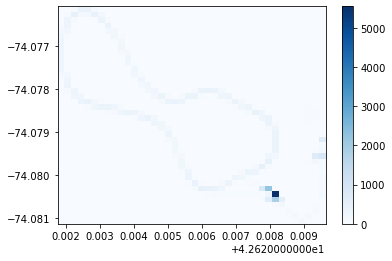

In [6]:
y = dfFixed['longitude(deg)']
x = dfFixed['latitude(deg)']
plt.hist2d(x, y, bins = (40, 40), cmap = 'Blues')
plt.colorbar();

Comments:
latitude/longitude on wrong axes

B. Now, create a new 2D histogram of the latitude and longitude but only include data that has a valid lap number. You should not be dropping any values or modifying your dataframe.

Consider your bin number again, and add a color bar.

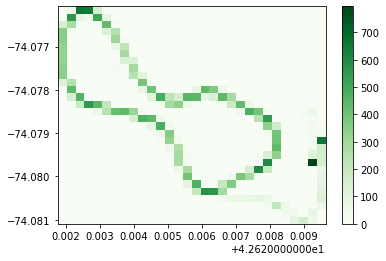

In [7]:
validLapData = dfFixed[dfFixed.lap.notnull()]
y = validLapData['longitude(deg)']
x = validLapData['latitude(deg)']
plt.hist2d(x, y, bins = (30, 30), cmap = 'Greens')
plt.colorbar();

These two histograms should be different. If you can't see a difference, you need to work on your code some more before moving on.

Explain what you have learned about the race from these histograms, and why they are different (in terms of the race data, not in terms of what you did differently in your code). What do the colors mean? What is the shape of the track?

## Race Explanation
- the darker colors indicate the how frequently the cars were recorded on the map. There seems to have been quite a few laps!
- the shape of the track reminds me of a cartoon character pointing at something. The line on the bottom right pointing upwards looks like it could be where the cars go before/after the race.

Now, plot the average RPM for each lap. Do not include any rows that contain NA values in the RPM or lap columns. Choose the correct graph type. You should be using filtering as part of this solution, and you should be plotting directly from your pandas dataframe (no separate call to plt.plot to create the plot).

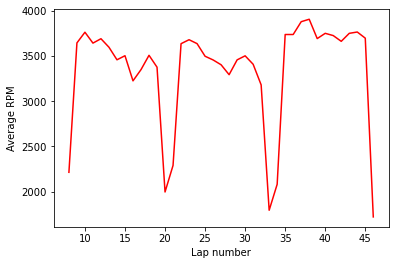

In [8]:
validLapandRPMData = dfFixed[(dfFixed.lap.notnull()) & (dfFixed.RPM.notnull())]
validLapandRPMData.groupby("lap")["RPM"].mean().plot(color = 'red', xlabel = "Lap number", ylabel = "Average RPM");

What is the max speed each lap? Plot it. Be sure to *only* ignore null values in the *relevant columns*, not all columns.

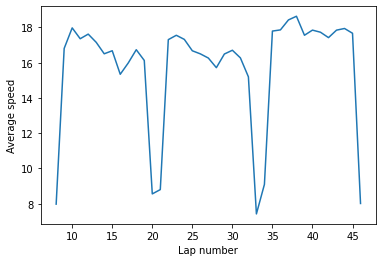

In [9]:
maxSpeed = dfFixed[(dfFixed.lap.notnull()) & (dfFixed.RPM.notnull())]
maxSpeed.groupby("lap")["speedOBD(m/s)"].mean().plot(xlabel = "Lap number", ylabel = "Average speed");

Comments:
you shouldn't be removing RPM null values here. Those aren't being used in the graphing.

## Part 2: Removing all null values first

Now we will remove all null values before doing any analysis. In the following cell, remove all rows that have at least one null value from the dataset.

NOTE: Remember that when you modify a dataframe, it is modified in your notebook. After you drop null values below, if you try to re-run cells above, you will be running on data without null values. If you need to get back to your original dataframe, you should consider restarting your notebook and re-running from the top to make sure you are working on the correct data. You do this step by going to the Kernel Menu, and choose "restart & clear output".

In [10]:
dfDroppedNan = dfFixed.dropna(how = 'any')
#i don't want to mess up the earlier stuff, so I am giving it a new name.

Recreate the latitude and longitude histogram with this version of the data. Use similar styling to your prior histogram.

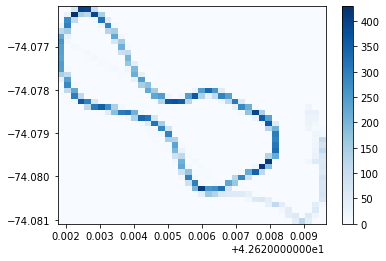

In [11]:
y = dfDroppedNan['longitude(deg)']
x = dfDroppedNan['latitude(deg)']
plt.hist2d(x, y, bins = (40, 40), cmap = 'Blues')
plt.colorbar();

Recreate the plot of the average RPM by lap, using the same styling as your prior graph.

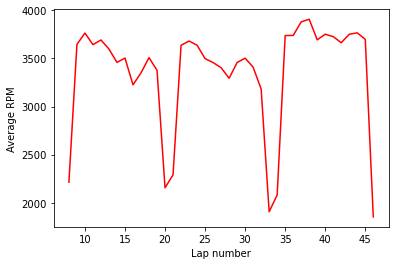

In [12]:
dfDroppedNan.groupby("lap")["RPM"].mean().plot(color = 'red', xlabel = "Lap number", ylabel = "Average RPM");

Recreate the plot of the maximum speed by lap.

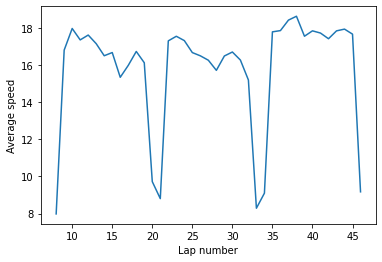

In [13]:
dfDroppedNan.groupby("lap")["speedOBD(m/s)"].mean().plot(xlabel = "Lap number", ylabel = "Average speed");

## Last few modifications to the dataframe

Now we'll practice adding new Series to our dataframe. We are assuming null values have been dropped already.

Let's add a new Series named "speed from mean" that holds how different the speed in that column was from the average speed over the course of the entire race. You should use a lambda function to create this column.

In [25]:
dfDroppedNan = dfDroppedNan.assign(speed_from_mean = lambda x: x["speed(m/s)"].mean() - x["speed(m/s)"])

In [23]:
dfDroppedNan.head()

,timestamp(s),lap,speed(m/s),altitude(m),lateral acceleration(m/s^2),longitudinal acceleration(m/s^2),distance(m),latitude(deg),longitude(deg),speedOBD(m/s),RPM,speed_from_mean,difference_between_speeds
5021,1425830923,8.0,8.140,334.0,-0.914,0.555,123.421,42.627702,-74.079932,7.705,2514.0,5.899452,0.435
5022,1425830923,8.0,8.205,334.0,-1.011,0.523,124.531,42.627711,-74.079928,7.778,2555.0,5.834452,0.427
5023,1425830923,8.0,8.250,334.0,-1.078,0.500,125.307,42.627718,-74.079925,7.932,2583.0,5.789452,0.318
5024,1425830923,8.0,8.373,334.0,-1.094,0.588,125.974,42.627723,-74.079922,8.050,2605.0,5.666452,0.323
5025,1425830923,8.0,8.665,334.0,-1.132,0.796,127.565,42.627737,-74.079915,8.333,2657.0,5.374452,0.332


This dataset contains two different speed values: the speed as determined by the car's odometer, and the speed as determined by the GPS unit. Let's see how different those calculations are. First, create a new Series named "difference between speeds" that holds the difference between speed and speed OBD values. Then plot the average difference by lap, modifying at least one aspect of the graph style. You do not have to use a lambda function for this question.

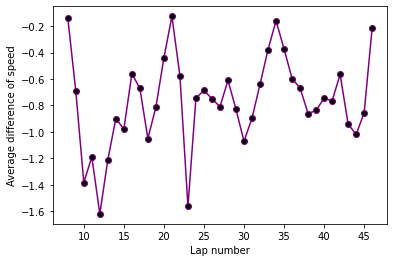

In [30]:
dfDroppedNan = dfDroppedNan.assign(difference_between_speeds = lambda x: x["speed(m/s)"] - x["speedOBD(m/s)"])

dfDroppedNan.groupby("lap")["difference_between_speeds"].mean().plot(color = 'purple', marker='o', mfc = "black", xlabel = "Lap number", ylabel = "Average difference of speed");

## Discuss 

In this assignment you practiced two different ways to deal with null values in your dataset. Discuss if your results were different between the two approaches, and when/if you should use one approach over the other.

- using insull/notnull - though it is a little more complicated to use, i can see using this when you don't want to change the database (even temporarily). It can provide you with good data in determining what columns did or did not have values. Perhaps the question in the survey, was hidden, misleading, or not required at first.
- using dropnull - Using dropnull was very easy and could help you if you want to make the data look cleaner. Having the option to drop 'all' or 'any' can ber very useful

There is much more analysis we could do on this data. What is another interesting question you could ask about this data?

- I could ask how the time differed per lap.
- Just to be able to see it, we could find out how long it took to take one lap depending on the speed.

# Grade
Ignore the below cell, which is used purely for noting your grade so that you can see it easily in JHub:
* 3: E (Exemplary)
* 2: M (Meets Expectations)
* 1: R (Requires Revision)
* 0: N (Not assessible)

Remember that the actual number has no meaning. But I can't put a letter into JHub, so we have to use a number to represent each grade.


YOUR ANSWER HERE

## Extra Practice

This is not graded in any way. But if you want extra practice with pandas, here is an opportunity.

Write the code to answer the question you asked above. You'll get more out of this opportunity if your question is significantly unrelated to the prior questions in this assignment. There's a lot of data in this file that you could analyze in many different ways with pandas.

In [17]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 